In [1]:
import pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines
%matplotlib inline

In [2]:
dataQ21 = pd.read_csv('data/figQ21.dat', index_col=False)
dataQ21;

In [3]:
dataQ22 = pd.read_csv('data/figQ22.dat', index_col=False)
dataQ22;

In [4]:
data = dataQ22

In [5]:
data = data[(data.bin!=0) | (data.Setup=='kin2')| (data.Setup=='kin4')]

In [6]:
data

,Setup,bin,X,dX,R3D,dR3D,PyRes,dPyRes,M7,1,H
1,kin1,1,0.86840,0.29549,-0.83982,0.11289,-0.02407,0.05224,-0.69491,1.0,-0.74662
2,kin1,2,1.62188,0.18295,-0.91679,0.12849,-0.08975,0.04742,-0.69082,1.0,-0.74691
3,kin1,3,2.23318,0.17320,-0.77322,0.08448,-0.04228,0.04400,-0.68728,1.0,-0.74763
4,kin1,4,2.86823,0.19828,-0.63883,0.05519,0.02418,0.04065,-0.68363,1.0,-0.74804
5,kin1,5,3.64858,0.26391,-0.79922,0.07426,-0.04120,0.03837,-0.67870,1.0,-0.74836
6,kin1,6,5.11923,0.84051,-0.72548,0.05692,-0.01511,0.03446,-0.66990,1.0,-0.75237
7,kin2,0,3.36296,1.62841,-0.87833,0.07930,-0.03003,0.02022,-0.77485,1.0,-0.79144
9,kin3,1,1.32180,0.47621,-1.49993,0.17708,-0.05988,0.02525,-1.10529,1.0,-1.39833
10,kin3,2,2.50092,0.27347,-1.24632,0.11654,-0.01139,0.02461,-1.09716,1.0,-1.39591
11,kin3,3,3.38688,0.24378,-1.03264,0.07852,0.03300,0.02376,-1.08892,1.0,-1.39562


In [7]:
x = data.X
xerr = data.dX
xList = [data.X[data.Setup=='kin1'],data.X[data.Setup=='kin2'],data.X[data.Setup=='kin3'],data.X[data.Setup=='kin4']]
xerrList = [data.dX[data.Setup=='kin1'],data.dX[data.Setup=='kin2'],data.dX[data.Setup=='kin3'],data.dX[data.Setup=='kin4']]

In [8]:
y = data.R3D / data.H
yerr = -data.dR3D / data.H
yList = [data.R3D[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         data.R3D[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         data.R3D[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         data.R3D[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
yerrList = [-data.dR3D[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         -data.dR3D[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         -data.dR3D[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         -data.dR3D[data.Setup=='kin4']/data.H[data.Setup=='kin4']]

In [9]:
xArenhovel = x
yArehnovel = data.M7 / data.H
yHAList = [data.M7[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         data.M7[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         data.M7[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         data.M7[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
yHAerrList = [-data.M7[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         -data.M7[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         -data.M7[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         -data.M7[data.Setup=='kin4']/data.H[data.Setup=='kin4']]

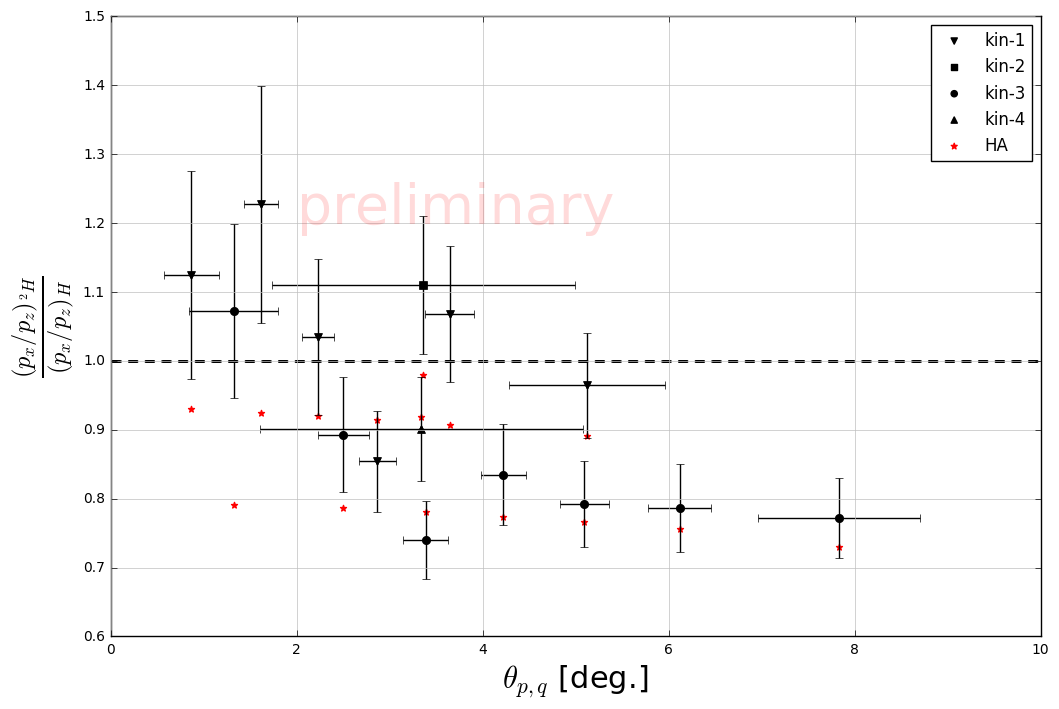

In [10]:
fig = plt.figure(figsize=(12,8))
colorList = ['black','black','black','black']
markerList= ['v','s','o','^']
for i in range(len(xList)):
    plt.scatter(xList[i], yList[i], color = colorList[i],
                 marker= markerList[i],
                 label='kin-%d'%(i+1))
    plt.errorbar(xList[i], yList[i], 
                 xerr=[xerrList[i],xerrList[i]], yerr=[yerrList[i],yerrList[i]],
                 color = colorList[i],
                 marker= markerList[i],
                 linestyle = 'none')
plt.xlabel('$\\theta_{p,q}$ [deg.]',fontsize=22)
plt.ylabel( r'$\frac{(p_{x}/p_{z})_{^{2}H}}{(p_{x}/p_{z})_{H}}$',fontsize=25)
ax = fig.add_subplot(111)
ax.text( 2, 1.2 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.75')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2)
plt.scatter(xArenhovel , yArehnovel, marker='*', color='r',label='HA')
ax.legend(scatterpoints=1)
plt.savefig("/Users/erezcohen/Desktop/theta_pq.pdf")

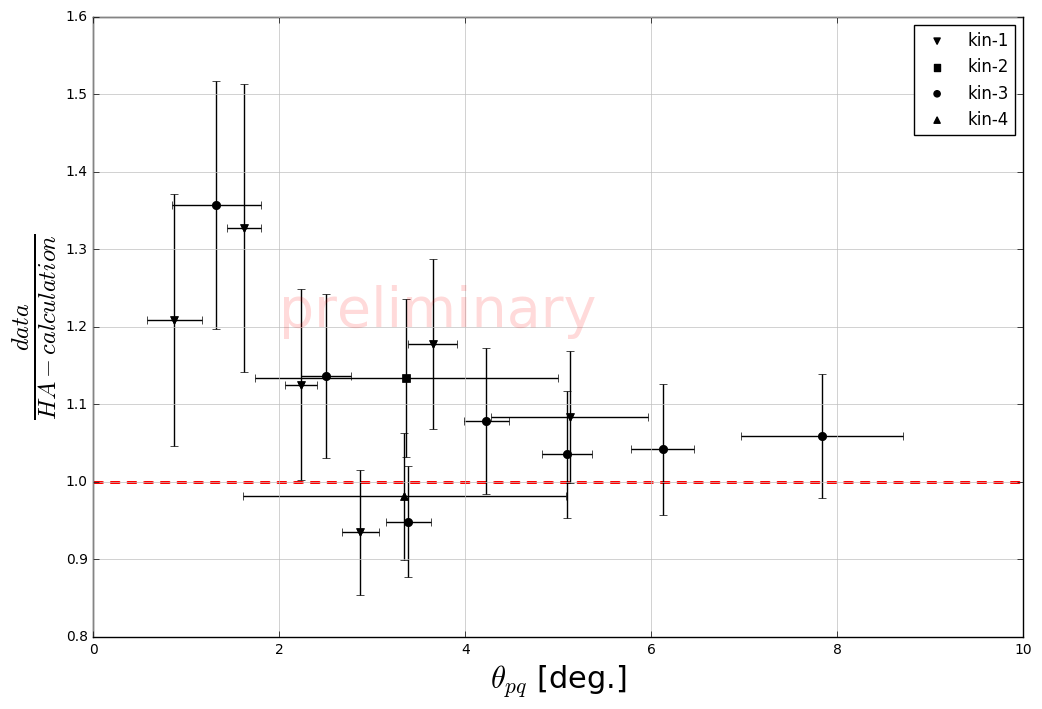

In [11]:
# now plot ratio of data to calculations...
fig = plt.figure(figsize=(12,8))
colorList = ['black','black','black','black']
markerList= ['v','s','o','^']
for i in range(len(xList)):
    y_ratio = yList[i]/yHAList[i]
    y_ratio_err = yerrList[i]/yHAList[i]
    plt.scatter(xList[i], y_ratio, color = colorList[i],
                 marker= markerList[i],
                 label='kin-%d'%(i+1))
    plt.errorbar(xList[i], y_ratio, 
                 xerr=[xerrList[i],xerrList[i]], yerr=[y_ratio_err,y_ratio_err],
                 color = colorList[i],
                 marker= markerList[i],
                 linestyle = 'none')
plt.xlabel('$\\theta_{pq}$ [deg.]',fontsize=22)
plt.ylabel( r'$\frac{data}{HA-calculation}$',fontsize=25)
ax = fig.add_subplot(111)
ax.text( 2, 1.2 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.75')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2,color='red')
ax.legend(scatterpoints=1)
plt.savefig("/Users/erezcohen/Desktop/theta_pq_ratio_to_HA.pdf")

In [12]:
data_Q2 = dataQ21
data_Q2 = data_Q2[(data_Q2.bin!=0) | (data_Q2.Setup=='kin2')| (data_Q2.Setup=='kin4')]
x = data_Q2.X
xerr = data_Q2.dX
xList = [data_Q2.X[data_Q2.Setup=='kin1'],data_Q2.X[data_Q2.Setup=='kin2'],data_Q2.X[data_Q2.Setup=='kin3'],data_Q2.X[data_Q2.Setup=='kin4']]
xerrList = [data_Q2.dX[data_Q2.Setup=='kin1'],data_Q2.dX[data_Q2.Setup=='kin2'],data_Q2.dX[data_Q2.Setup=='kin3'],data_Q2.dX[data_Q2.Setup=='kin4']]
y = data_Q2.R3D / data_Q2.H
yerr = -data_Q2.dR3D / data.H
yList = [data_Q2.R3D[data_Q2.Setup=='kin1']/data.H[data_Q2.Setup=='kin1'],
         data_Q2.R3D[data_Q2.Setup=='kin2']/data.H[data_Q2.Setup=='kin2'],
         data_Q2.R3D[data_Q2.Setup=='kin3']/data.H[data_Q2.Setup=='kin3'],
         data_Q2.R3D[data_Q2.Setup=='kin4']/data.H[data_Q2.Setup=='kin4']]
yerrList = [-data_Q2.dR3D[data_Q2.Setup=='kin1']/data_Q2.H[data_Q2.Setup=='kin1'],
         -data_Q2.dR3D[data_Q2.Setup=='kin2']/data.H[data_Q2.Setup=='kin2'],
         -data_Q2.dR3D[data_Q2.Setup=='kin3']/data.H[data_Q2.Setup=='kin3'],
         -data_Q2.dR3D[data_Q2.Setup=='kin4']/data.H[data_Q2.Setup=='kin4']]
xArenhovel = x
yArehnovel = data_Q2.M7 / data_Q2.H

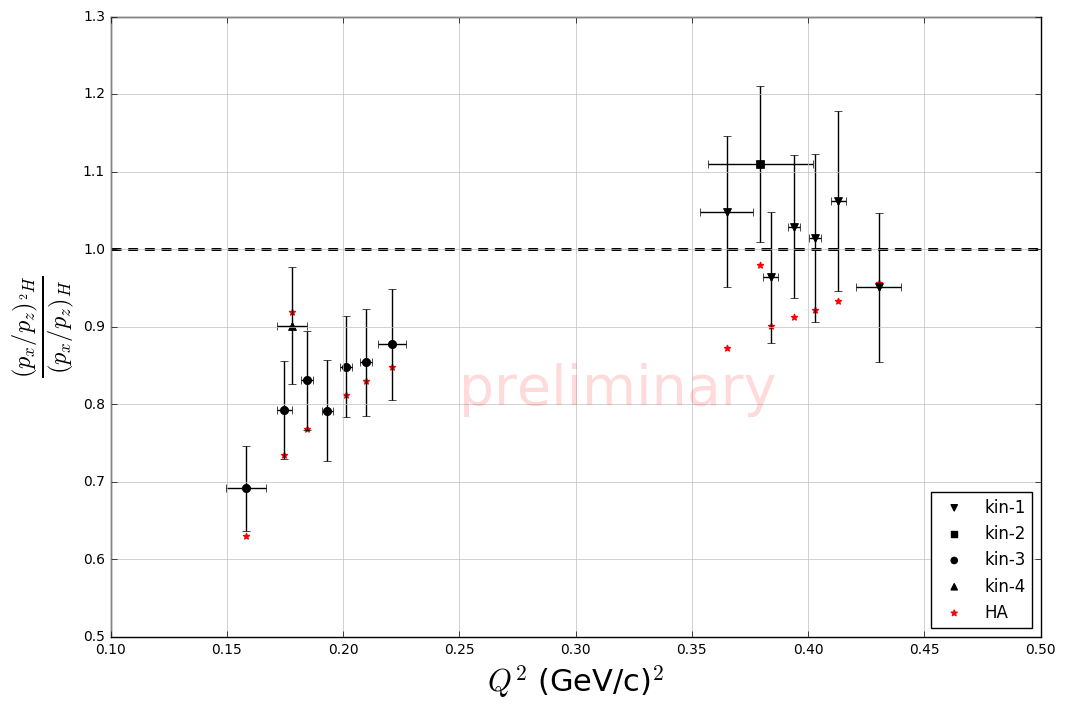

In [13]:
fig = plt.figure(figsize=(12,8))
colorList = ['black','black','black','black']
markerList= ['v','s','o','^']
for i in range(len(xList)):
    plt.scatter(xList[i], yList[i], color = colorList[i],
                 marker= markerList[i],
                 label='kin-%d'%(i+1))
    plt.errorbar(xList[i], yList[i], 
                 xerr=[xerrList[i],xerrList[i]], yerr=[yerrList[i],yerrList[i]],
                 color = colorList[i],
                 marker= markerList[i],
                 linestyle = 'none')
plt.xlabel('$Q^{2}$ (GeV/c)$^{2}$',fontsize=22)
plt.ylabel( r'$\frac{(p_{x}/p_{z})_{^{2}H}}{(p_{x}/p_{z})_{H}}$',fontsize=25)
ax = fig.add_subplot(111)
ax.text( 0.25, 0.8 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.75')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2)
plt.scatter(xArenhovel , yArehnovel, marker='*', color='r',label='HA')
ax.legend(loc="lower right",scatterpoints=1)
plt.savefig("/Users/erezcohen/Desktop/Q2.pdf")

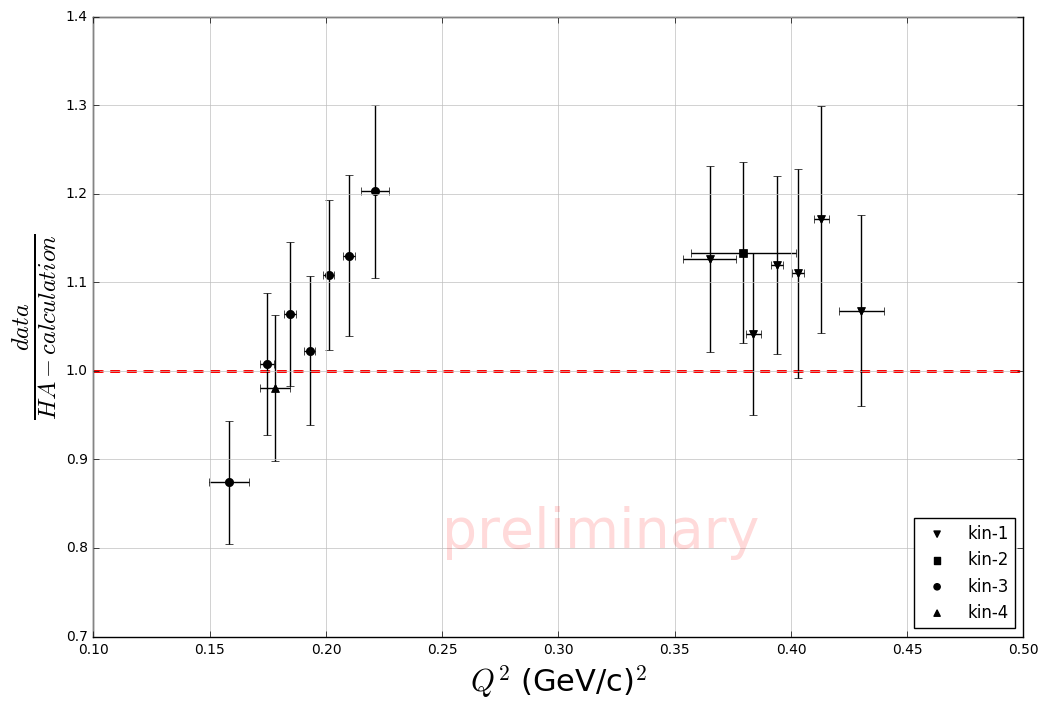

In [14]:
# now plot ratio of data to calculations...
fig = plt.figure(figsize=(12,8))
colorList = ['black','black','black','black']
markerList= ['v','s','o','^']
for i in range(len(xList)):
    y_ratio = yList[i]/yHAList[i]
    y_ratio_err = yerrList[i]/yHAList[i]
    plt.scatter(xList[i], y_ratio, color = colorList[i],
                 marker= markerList[i],
                 label='kin-%d'%(i+1))
    plt.errorbar(xList[i], y_ratio, 
                 xerr=[xerrList[i],xerrList[i]], yerr=[y_ratio_err,y_ratio_err],
                 color = colorList[i],
                 marker= markerList[i],
                 linestyle = 'none')
plt.xlabel('$Q^{2}$ (GeV/c)$^{2}$',fontsize=22)
plt.ylabel( r'$\frac{data}{HA-calculation}$',fontsize=25)
ax = fig.add_subplot(111)
ax.text( 0.25, 0.8 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.75')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2 , color='red')
ax.legend(loc="lower right",scatterpoints=1)
plt.savefig("/Users/erezcohen/Desktop/Q2_ratio_to_HA.pdf")

In [43]:
dataTHIQ = pd.read_csv('data/figTHIQ.dat', index_col=False)
data = dataTHIQ
data = data[(data.bin!=0) | (data.Setup=='kin2')| (data.Setup=='kin4')]
data

,Setup,bin,X,dX,R3D,dR3D,PyRes,dPyRes,M7,1,H
1,kin1,1,27.46412,10.011940,-0.97808,0.147030,-0.08133,0.04733,-0.70732,1.0,-0.80337
2,kin1,2,53.67662,6.575844,-0.65729,0.061010,-0.00847,0.04053,-0.68947,1.0,-0.77925
3,kin1,3,76.56928,6.720640,-0.69916,0.065130,-0.04025,0.03902,-0.68140,1.0,-0.75563
4,kin1,4,100.32354,6.980631,-0.78058,0.070780,-0.00616,0.03865,-0.67825,1.0,-0.73672
5,kin1,5,124.76143,7.084720,-0.80592,0.073330,-0.03707,0.03887,-0.67594,1.0,-0.71851
6,kin1,6,152.38641,10.222570,-0.70189,0.062660,0.02279,0.04464,-0.67267,1.0,-0.69648
7,kin2,0,163.82181,8.237450,-0.87833,0.079300,-0.03003,0.02022,-0.77485,1.0,-0.79144
9,kin3,1,5.44309,1.972640,-1.34493,0.144680,-0.04087,0.02446,-1.09341,1.0,-1.42463
10,kin3,2,10.36733,1.145180,-1.23260,0.106390,-0.00720,0.02380,-1.08294,1.0,-1.42045
11,kin3,3,14.08924,1.028910,-1.13741,0.099280,-0.00994,0.02299,-1.07398,1.0,-1.41502


In [44]:
x = data.X
xerr = data.dX
xList = [data.X[data.Setup=='kin1'],data.X[data.Setup=='kin2'],data.X[data.Setup=='kin3'],data.X[data.Setup=='kin4']]
xerrList = [data.dX[data.Setup=='kin1'],data.dX[data.Setup=='kin2'],data.dX[data.Setup=='kin3'],data.dX[data.Setup=='kin4']]
y = data.R3D / data.H
yerr = -data.dR3D / data.H
yList = [data.R3D[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         data.R3D[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         data.R3D[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         data.R3D[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
yerrList = [-data.dR3D[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         -data.dR3D[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         -data.dR3D[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         -data.dR3D[data.Setup=='kin4']/data.H[data.Setup=='kin4']]

[1     1.217471
2     0.843491
3     0.925268
4     1.059534
5     1.121655
6     1.007768
7     1.109787
9     0.944056
10    0.867753
11    0.803812
12    0.754555
13    0.841807
14    0.788151
15    0.928605
16    0.901015
dtype: float64, 1     0.183017
2     0.078293
3     0.086193
4     0.096074
5     0.102058
6     0.089967
7     0.100197
9     0.101556
10    0.074899
11    0.070162
12    0.057204
13    0.063873
14    0.061025
15    0.086437
16    0.075430
dtype: float64]


In [49]:
xArenhovel = x
yArehnovel = data.M7 / data.H
yHAList = [data.M7[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         data.M7[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         data.M7[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         data.M7[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
yHAerrList = [-data.M7[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
         -data.M7[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
         -data.M7[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
         -data.M7[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
yArehnovel

1     0.880441
2     0.884787
3     0.901764
4     0.920635
5     0.940752
6     0.965814
7     0.979038
9     0.767505
10    0.762392
11    0.758986
12    0.757567
13    0.760315
14    0.773789
15    0.802226
16    0.918760
dtype: float64

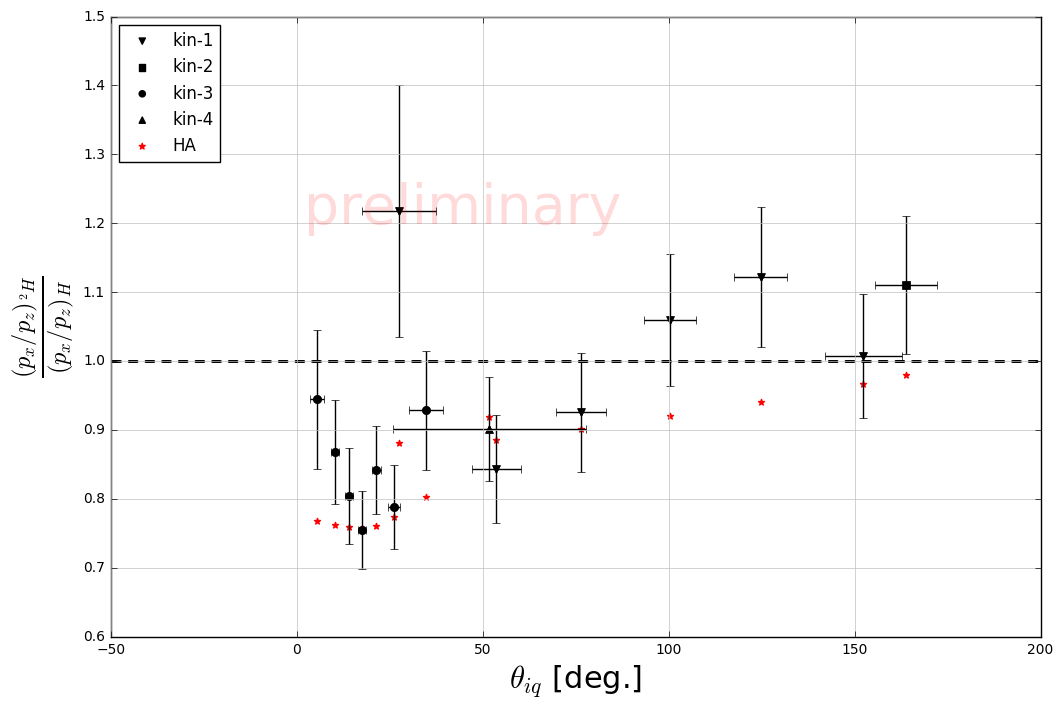

In [46]:
fig = plt.figure(figsize=(12,8))
colorList = ['black','black','black','black']
markerList= ['v','s','o','^']
for i in range(len(xList)):
    plt.scatter(xList[i], yList[i], color = colorList[i],
                 marker= markerList[i],
                 label='kin-%d'%(i+1))
    plt.errorbar(xList[i], yList[i], 
                 xerr=[xerrList[i],xerrList[i]], yerr=[yerrList[i],yerrList[i]],
                 color = colorList[i],
                 marker= markerList[i],
                 linestyle = 'none')
plt.xlabel('$\\theta_{iq}$ [deg.]',fontsize=22)
plt.ylabel( r'$\frac{(p_{x}/p_{z})_{^{2}H}}{(p_{x}/p_{z})_{H}}$',fontsize=25)
ax = fig.add_subplot(111)
ax.text( 2, 1.2 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.75')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2)
plt.scatter(xArenhovel , yArehnovel, marker='*', color='r',label='HA')
ax.legend(scatterpoints=1,loc='upper left')
plt.savefig("/Users/erezcohen/Desktop/theta_iq.pdf")

1    1.382797
2    0.953326
3    1.026064
4    1.150874
5    1.192295
6    1.043439
dtype: float64
7    1.133548
dtype: float64
9     1.230033
10    1.138198
11    1.059061
12    0.996024
13    1.107181
14    1.018560
15    1.157535
dtype: float64
16    0.980686
dtype: float64


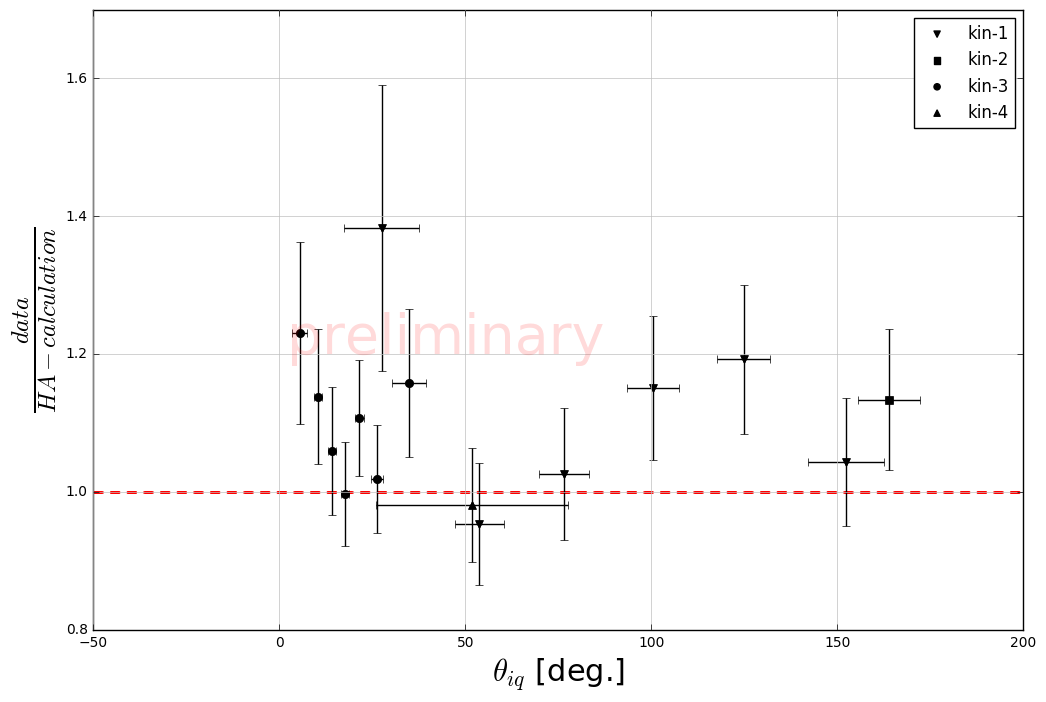

In [50]:
# now plot ratio of data to calculations...
fig = plt.figure(figsize=(12,8))
colorList = ['black','black','black','black']
markerList= ['v','s','o','^']
for i in range(len(xList)):
    y_ratio = yList[i]/yHAList[i]
    print y_ratio
    y_ratio_err = yerrList[i]/yHAList[i]
    plt.scatter(xList[i], y_ratio, color = colorList[i],
                 marker= markerList[i],
                 label='kin-%d'%(i+1))
    plt.errorbar(xList[i], y_ratio, 
                 xerr=[xerrList[i],xerrList[i]], yerr=[y_ratio_err,y_ratio_err],
                 color = colorList[i],
                 marker= markerList[i],
                 linestyle = 'none')
plt.xlabel('$\\theta_{iq}$ [deg.]',fontsize=22)
plt.ylabel( r'$\frac{data}{HA-calculation}$',fontsize=25)
ax = fig.add_subplot(111)
ax.text( 2, 1.2 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.75')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2,color='red')
ax.legend(scatterpoints=1)
plt.savefig("/Users/erezcohen/Desktop/theta_iq_ratio_to_HA.pdf")